In [1]:
"""
seaborn系列 (14) | 条形图barplot() 原创
脑机接口社区2022-01-24 18:16:14博主文章分类：数据分析与可视化

条形图
条形图主要展现的是每个矩形高度的数值变量的中心趋势的估计。
注：条形图只显示平均值（或其他估计值）。但在很多情况下，每个分类变量级别上显示值的分布可能提供更多信息，
此时很多其他方法，如一个盒子或小提琴图可能更合适。

函数原型
seaborn.barplot(x=None, y=None, hue=None, 
                data=None, order=None, hue_order=None, 
                estimator=<function mean>, ci=95, 
                n_boot=1000, units=None, orient=None, 
                color=None, palette=None, saturation=0.75, 
                errcolor='.26', errwidth=None, capsize=None, 
                dodge=True, ax=None, **kwargs)

参数解读
x,y,hue:数据字段变量名(如上表，date,name,age,sex为数据字段变量名)

data: DataFrame,数组或数组列表

order,hue_order:字符串列表
作用：显式指定分类顺序，eg. order=[字段变量名1，字段变量名2,...]

estimator:可回调函数
作用：设置每个分类箱的统计函数

ci:float或者"sd"或None
在估计值附近绘制置信区间的大小，如果是"sd"，
则跳过bootstrapping并绘制观察的标准差，
如果为None,则不执行bootstrapping,并且不绘制错误条。

n_boot:int
计算置信区间时使用的引导迭代次数

orient: v | h
图的显示方向(垂直或水平,即横向或纵向)，
这通常可以从输入变量的dtype推断得到

color:matplotlib颜色

palette:调试板名称，列表或字典类型
作用：设置hue指定的变量的不同级别颜色。

saturation 饱和度：float

errcolor : matplotlib color
作用：表示置信区间的线条颜色

errwidth:float
作用：表示误差线的厚度

capsize:float
作用：表示误差线上"帽"的宽度(误差线上的横线的宽度)

dodge:bool
作用：使用色调嵌套时，是否应沿分类轴移动元素。
-----------------------------------
©著作权归作者所有：来自51CTO博客作者脑机接口社区的原创作品，请联系作者获取转载授权，否则将追究法律责任
seaborn系列 (14) | 条形图barplot()
https://blog.51cto.com/u_6811786/4967856
-----------------------------------
"""
import seaborn as sns
import matplotlib.pyplot as plt
# 设置样式风格
sns.set(style="darkgrid")
# 构建数据
tips = sns.load_dataset("tips", data_home='./seaborn-data', cache=True)

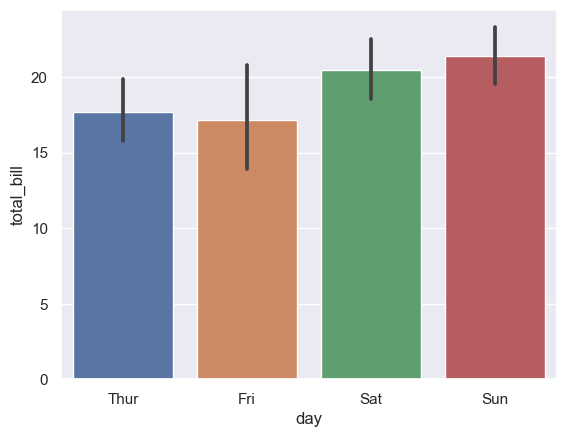

In [2]:
"""
案例1：
指定x分类变量进行分组，指定 y为数据分布，绘制垂直条形图
"""
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

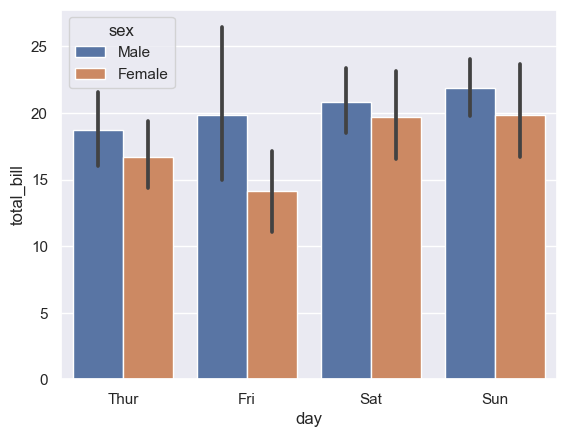

In [3]:
"""
案例2：
指定hue对已分组的数据进行嵌套分组(第二次分组)并绘制条形图
"""
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

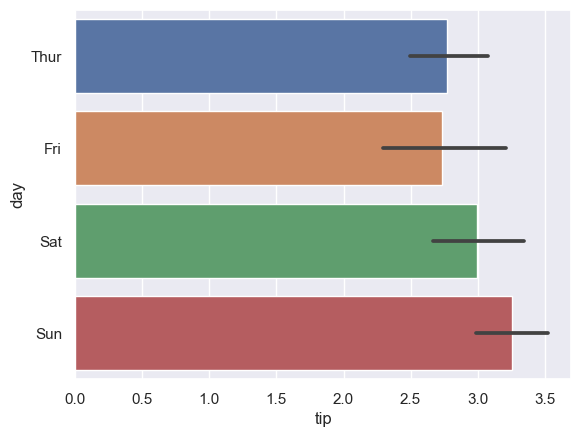

In [4]:
"""
案例3：
指定 y 为分类变量进行分组，x 为数据分布 (这样的效果相当于水平条形图)
"""
sns.barplot(x="tip", y="day", data=tips)
plt.show()

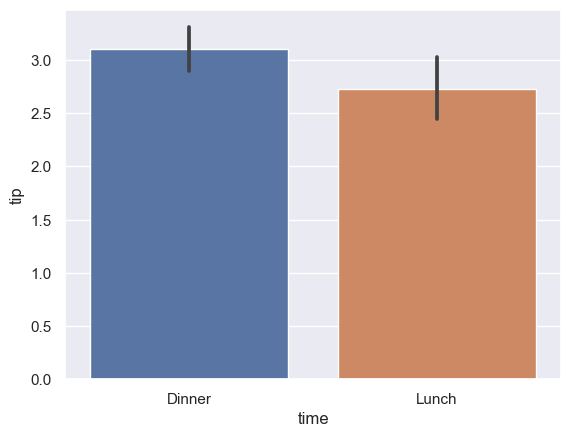

In [5]:
"""
案例4：
设置order=["变量名1","变量名2",...]来显示指定分类顺序
"""
sns.barplot(x="time", y="tip", data=tips,
            order=["Dinner", "Lunch"])
plt.show()

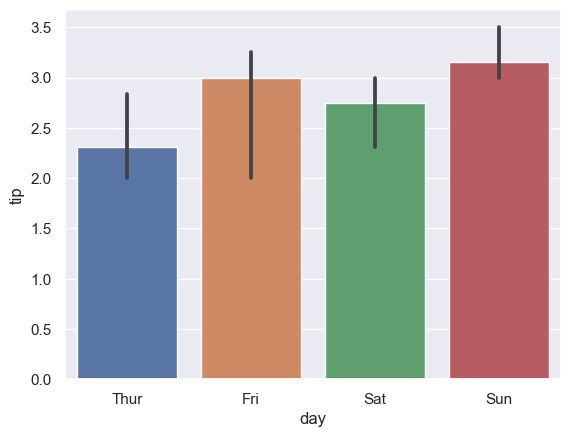

In [6]:
"""
案例5：
使用中位数作为集中趋势的估计：estimator=median
"""
sns.barplot(x="day", y="tip", data=tips, estimator='median')
plt.show()

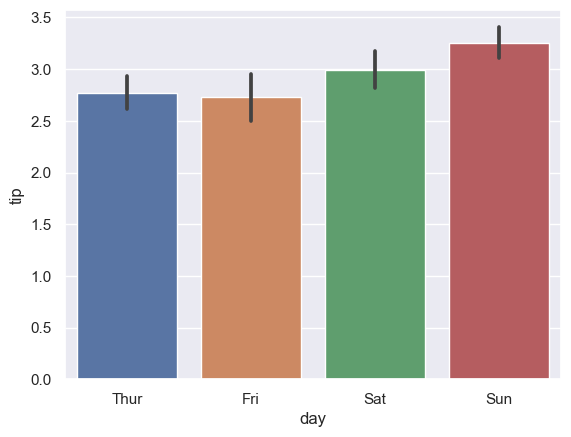

In [8]:
"""
案例6：
使用误差线显示均值的标准差
"""
sns.barplot(x="day", y="tip", data=tips, errorbar=('ci', 68))
plt.show()

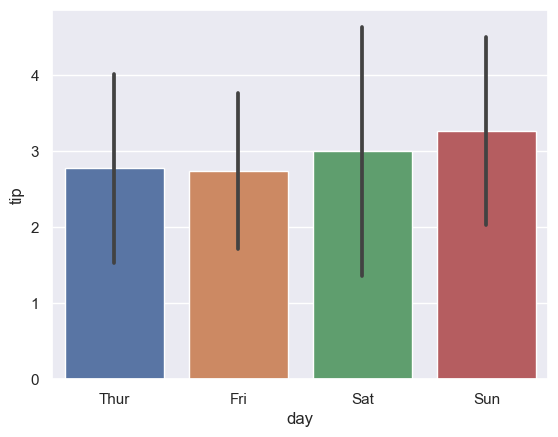

In [10]:
"""
案例7：
设置ci="sd" 显示观测值的标准偏差而不是置信区间
"""
sns.barplot(x="day", y="tip", data=tips, errorbar='sd')
plt.show()

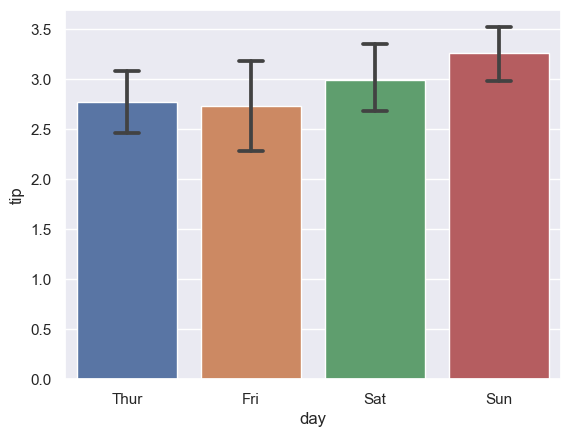

In [11]:
"""
案例8：
设置 capsize,如果capsize>0则添加 caps到错误条上，否则没有错误条
"""
sns.barplot(x="day", y="tip", data=tips, capsize=.2)
plt.show()

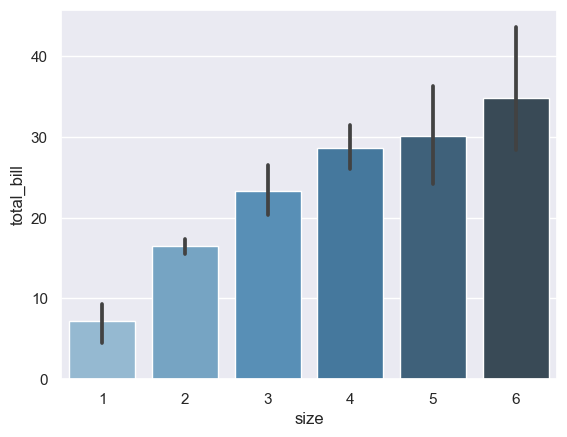

In [13]:
"""
案例9：
使用不同的调色版：palette="Blues_d"
"""
sns.barplot(x="size", y="total_bill", data=tips,
            palette="Blues_d")
plt.show()

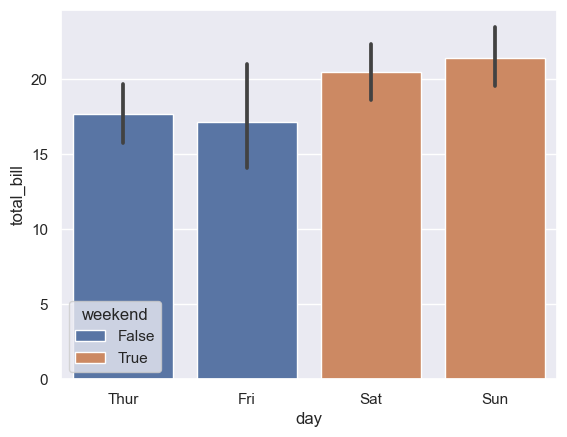

In [14]:
"""
案例10：
使用不同的调色版
"""
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.barplot(x="day", y="total_bill", hue="weekend",
            data=tips, dodge=False)
plt.show()

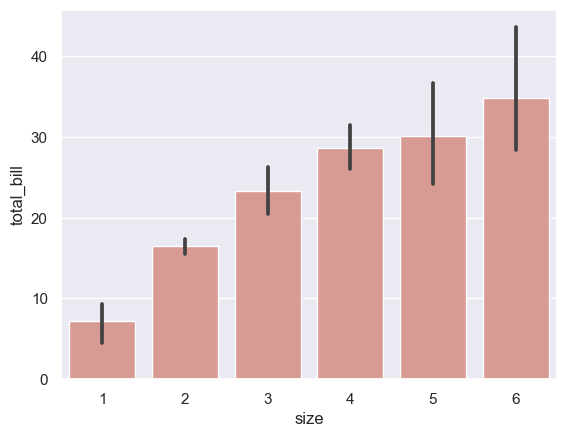

In [15]:
"""
案例11：
设置color指定所有bar使用同一颜色
"""
sns.barplot(x="size", y="total_bill", data=tips,
            color="salmon", saturation=.5)
plt.show()

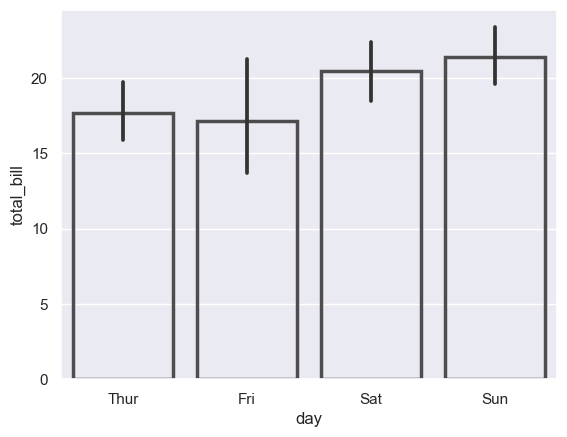

In [17]:
"""
案例12：
linewidth:线宽
facecolor:封闭区域内部的颜色： facecolor=(R, G, B, A),
edgecolor:边颜色
"""
sns.barplot(x="day", y="total_bill", data=tips,
            linewidth=2.5, facecolor=(1, 1, 1, 0),
             errcolor=".2",edgecolor=".3")
plt.show()

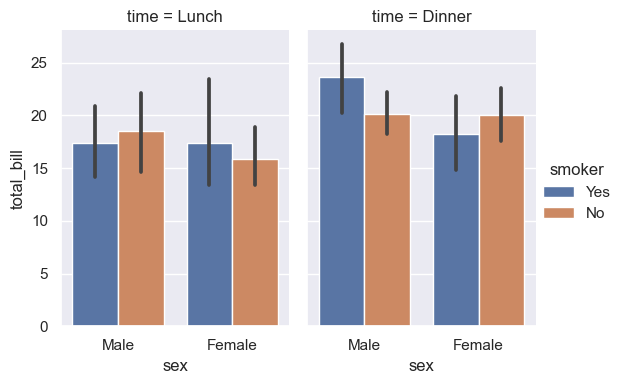

In [18]:
"""
案例13：
使用catplot()实现barplot()的效果(通过指定kind=bar)
"""
sns.catplot(x="sex", y="total_bill",
            hue="smoker", col="time",
            data=tips, kind="bar",
            height=4, aspect=.7)
plt.show()